In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\Datasets\Loan Prediction\train.csv')

In [2]:
df.head() #Top 5 records

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


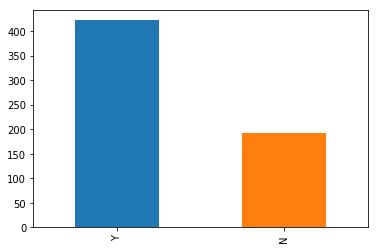

In [3]:
df['Loan_Status'].value_counts().plot.bar() #Frequency distribution via bar plot

Clearly it is evident that the target variable or dependent variable is imbalanced towards class = 'Y'. Let us see how much imbalance is there by taking value count

In [4]:
df['Loan_Status'].value_counts() #Frequency distribution table for target class "Loan_Status"

Y    422
N    192
Name: Loan_Status, dtype: int64

It can be clearly seen that we have 422 observations or training examples for which the Loan status is 'Y' and 192 for which Loan_Status is 'N'

There are several ways to resolve this issue, Major ones being :
    1.Random Over-Sampling
    2.Random Under-Sampling
    3.By assigning class_weight in Random Forest
    4.Ada-boost 
    5.GBM 
    6.XGBoost
    
We will have look at each one of them.

For now let us proceed to the first method that is Random Over-Sampling , Let us start with Re-Sampling.

# Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

Let us first split the data-set by class 'Y' and 'N'



In [5]:
df_Y = df[df['Loan_Status']=='Y']
df_N = df[df['Loan_Status']=='N']

Let us first start with Random Under-sampling

In [6]:
count_y,count_N = df['Loan_Status'].value_counts()
df_Y_under = df_Y.sample(count_N)

In [7]:
df_under = pd.concat([df_Y_under,df_N],axis=0)

In [8]:
df_under.shape

(384, 13)

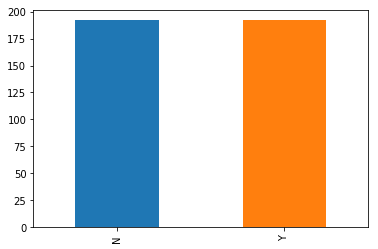

In [9]:
df_under['Loan_Status'].value_counts().plot.bar()

In [10]:
df_under['Loan_Status'].value_counts()

N    192
Y    192
Name: Loan_Status, dtype: int64

In [11]:
df_N_over = df_N.sample(count_y,replace=True)

In [12]:
df_N_over.shape

(422, 13)

In [13]:
df_Y.shape

(422, 13)

In [14]:
df_over = pd.concat([df_Y,df_N_over],axis=0)

In [15]:
df_over.shape

(844, 13)

In [16]:
df_under.shape

(384, 13)

In [17]:
df_over.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,844.000000,844.000000,806.000000,822.000000,779.000000
mean,5286.207346,1712.831659,146.576923,344.788321,0.754814
std,6109.106635,3547.015891,83.047339,63.742184,0.430474
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2761.750000,0.000000,100.000000,360.000000,1.000000
50%,3717.000000,1084.500000,128.000000,360.000000,1.000000
75%,5717.500000,2333.750000,165.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [18]:
df_over.isnull().sum() #Gives null values for all the features

Loan_ID               0
Gender               21
Married               3
Dependents           24
Education             0
Self_Employed        37
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           38
Loan_Amount_Term     22
Credit_History       65
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df_under.isnull().sum()

Loan_ID               0
Gender                7
Married               1
Dependents           12
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       28
Property_Area         0
Loan_Status           0
dtype: int64

In [123]:
df_over['Gender'].fillna(df_over['Gender'].mode()[0],inplace=True)
df_over['Married'].fillna(df_over['Married'].mode()[0],inplace=True)
df_over['Dependents'].fillna(df_over['Dependents'].mode()[0],inplace=True)
df_over['Self_Employed'].fillna(df_over['Self_Employed'].mode()[0],inplace=True)
df_over['LoanAmount'].fillna(df_over['LoanAmount'].mean(),inplace=True)
df_over['Loan_Amount_Term'].fillna(df_over['Loan_Amount_Term'].mean(),inplace=True)
df_over['Credit_History'].fillna(df_over['Credit_History'].mode()[0],inplace=True)

df_under['Gender'].fillna(df_under['Gender'].mode()[0],inplace=True)
df_under['Married'].fillna(df_under['Married'].mode()[0],inplace=True)
df_under['Dependents'].fillna(df_under['Dependents'].mode()[0],inplace=True)
df_under['Self_Employed'].fillna(df_under['Self_Employed'].mode()[0],inplace=True)
df_under['LoanAmount'].fillna(df_under['LoanAmount'].mean(),inplace=True)
df_under['Loan_Amount_Term'].fillna(df_under['Loan_Amount_Term'].mean(),inplace=True)
df_under['Credit_History'].fillna(df_under['Credit_History'].mode()[0],inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [21]:
df_over.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df_under.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [124]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

We will only do it for df_over DataFrame. 

In [23]:
df_over = df_over.iloc[:,1:]

In [24]:
df_over['Gender'].value_counts()

Male      702
Female    142
Name: Gender, dtype: int64

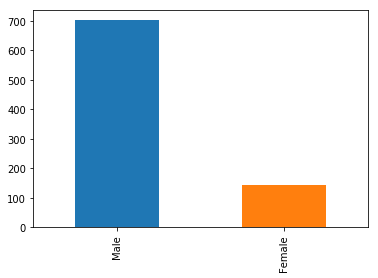

In [25]:
df_over['Gender'].value_counts().plot.bar()

In [26]:
df_over[df_over['Loan_Status']=='Y']['Gender'].value_counts()

Male      347
Female     75
Name: Gender, dtype: int64

In [27]:
df_over[df_over['Loan_Status']=='N']['Gender'].value_counts()

Male      355
Female     67
Name: Gender, dtype: int64

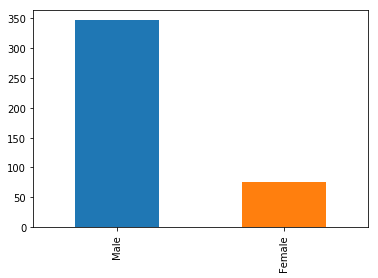

In [28]:
df_over[df_over['Loan_Status']=='Y']['Gender'].value_counts().plot.bar()

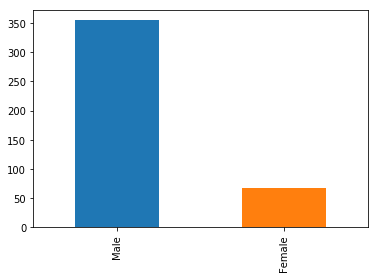

In [29]:
df_over[df_over['Loan_Status']=='N']['Gender'].value_counts().plot.bar()

In [30]:
a=347/692*100
b=75/152*100

In [31]:
print('Percentage of Male who got loan approved : ',a)
print('Percentage of Female who got loan approved : ',b)

Percentage of Male who got loan approved :  50.144508670520224
Percentage of Female who got loan approved :  49.34210526315789


In [32]:
df_over['Married'].value_counts()

Yes    540
No     304
Name: Married, dtype: int64

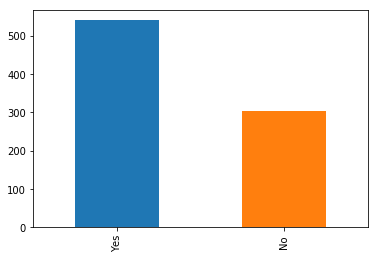

In [33]:
df_over['Married'].value_counts().plot.bar()

In [34]:
df_over[df_over['Loan_Status']=='Y']['Married'].value_counts()

Yes    288
No     134
Name: Married, dtype: int64

In [35]:
df_over[df_over['Loan_Status']=='N']['Married'].value_counts()

Yes    252
No     170
Name: Married, dtype: int64

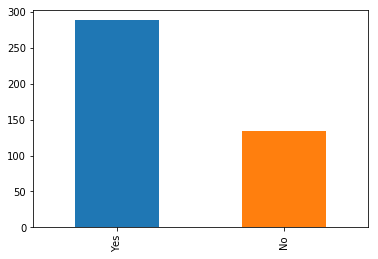

In [36]:
df_over[df_over['Loan_Status']=='Y']['Married'].value_counts().plot.bar()

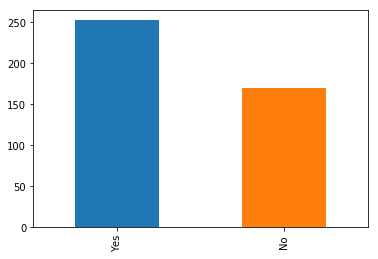

In [37]:
df_over[df_over['Loan_Status']=='N']['Married'].value_counts().plot.bar()

In [38]:
a=(288/(288+258))*100
b=134/298*100

In [39]:
print('Percentage of Married who got loan approved : ',a)
print('Percentage of Un-Married who got loan approved : ',b)

Percentage of Married who got loan approved :  52.74725274725275
Percentage of Un-Married who got loan approved :  44.966442953020135


In [40]:
df_over['Dependents'].value_counts()

0     509
1     136
2     130
3+     69
Name: Dependents, dtype: int64

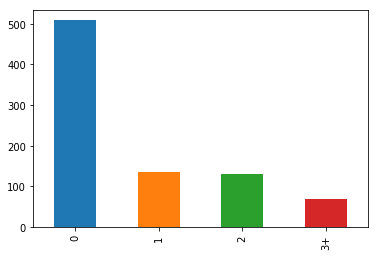

In [41]:
df_over['Dependents'].value_counts().plot.bar()

In [42]:
df_over[df_over['Loan_Status']=='Y']['Dependents'].value_counts()

0     247
2      76
1      66
3+     33
Name: Dependents, dtype: int64

In [43]:
df_over[df_over['Loan_Status']=='N']['Dependents'].value_counts()

0     262
1      70
2      54
3+     36
Name: Dependents, dtype: int64

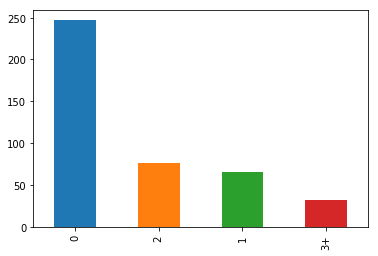

In [44]:
df_over[df_over['Loan_Status']=='Y']['Dependents'].value_counts().plot.bar()

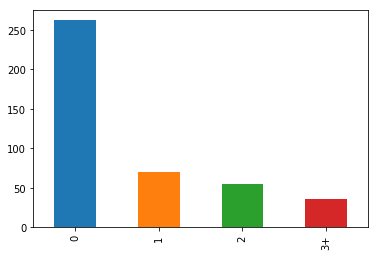

In [45]:
df_over[df_over['Loan_Status']=='N']['Dependents'].value_counts().plot.bar()

In [46]:
a=(247/(513))*100
b=76/128*100
c=66/128*100
d=33/75*100

In [47]:
print('Percentage of people with 0 dependents who got loan approved : ',a)
print('Percentage of people with 1 dependents who got loan approved : ',b)
print('Percentage of people with 2 dependentswho got loan approved : ',c)
print('Percentage of people with 3+ dependents who got loan approved : ',d)

Percentage of people with 0 dependents who got loan approved :  48.148148148148145
Percentage of people with 1 dependents who got loan approved :  59.375
Percentage of people with 2 dependentswho got loan approved :  51.5625
Percentage of people with 3+ dependents who got loan approved :  44.0


In [48]:
df_over['Education'].value_counts()

Graduate        642
Not Graduate    202
Name: Education, dtype: int64

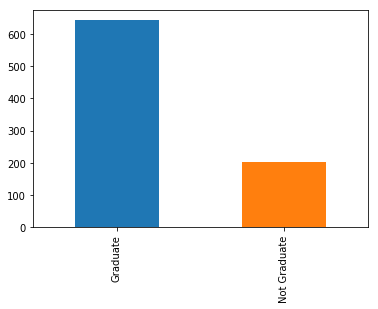

In [49]:
df_over['Education'].value_counts().plot.bar()

In [50]:
df_over[df_over['Loan_Status']=='Y']['Education'].value_counts()

Graduate        340
Not Graduate     82
Name: Education, dtype: int64

In [51]:
df_over[df_over['Loan_Status']=='N']['Education'].value_counts()

Graduate        302
Not Graduate    120
Name: Education, dtype: int64

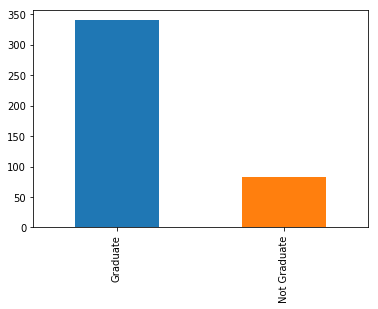

In [52]:
df_over[df_over['Loan_Status']=='Y']['Education'].value_counts().plot.bar()

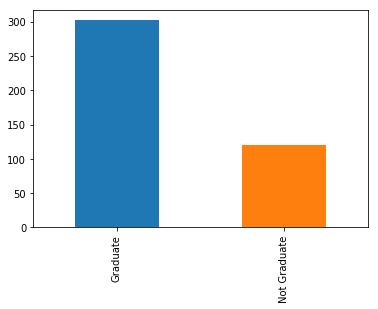

In [53]:
df_over[df_over['Loan_Status']=='N']['Education'].value_counts().plot.bar()

In [54]:
a=340/641*100
b=82/203*100

In [55]:
print('Percentage of people with graduation who got loan approved : ',a)
print('Percentage of people with no graduation who got loan approved : ',b)

Percentage of people with graduation who got loan approved :  53.042121684867396
Percentage of people with no graduation who got loan approved :  40.39408866995074


In [56]:
df_over['Self_Employed'].value_counts()

No     732
Yes    112
Name: Self_Employed, dtype: int64

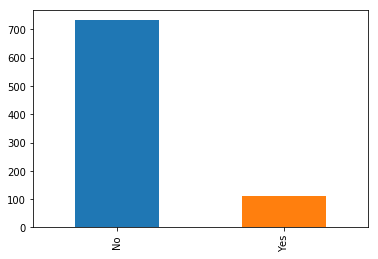

In [57]:
df_over['Self_Employed'].value_counts().plot.bar()

In [58]:
df_over[df_over['Loan_Status']=='Y']['Self_Employed'].value_counts()

No     366
Yes     56
Name: Self_Employed, dtype: int64

In [59]:
df_over[df_over['Loan_Status']=='N']['Self_Employed'].value_counts()

No     366
Yes     56
Name: Self_Employed, dtype: int64

In [60]:
a = 366/726*100
b=56/118*100

In [61]:
print('Percentage of people who were not self employed got loan approved : ',a)
print('Percentage of people who were self employed got loan approved : ',b)

Percentage of people who were not self employed got loan approved :  50.413223140495866
Percentage of people who were self employed got loan approved :  47.45762711864407


In [62]:
df_over['Credit_History'].value_counts()

1.0    653
0.0    191
Name: Credit_History, dtype: int64

In [63]:
df_over[df_over['Loan_Status']=='Y']['Credit_History'].value_counts()

1.0    415
0.0      7
Name: Credit_History, dtype: int64

In [64]:
df_over[df_over['Loan_Status']=='N']['Credit_History'].value_counts()

1.0    238
0.0    184
Name: Credit_History, dtype: int64

In [65]:
a = 415/651*100
b = 7/193*100

In [66]:
print('Percentage of people who had credit history got loan approved : ',a)
print('Percentage of people who did not had credit history got loan approved : ',b)

Percentage of people who had credit history got loan approved :  63.74807987711214
Percentage of people who did not had credit history got loan approved :  3.6269430051813467


In [67]:
df_over['Property_Area'].value_counts()

Urban        289
Semiurban    284
Rural        271
Name: Property_Area, dtype: int64

In [68]:
df_over[df_over['Loan_Status']=='Y']['Property_Area'].value_counts()

Semiurban    179
Urban        133
Rural        110
Name: Property_Area, dtype: int64

In [69]:
df_over[df_over['Loan_Status']=='N']['Property_Area'].value_counts()

Rural        161
Urban        156
Semiurban    105
Name: Property_Area, dtype: int64

In [70]:
a = 179/291*100
b = 133/284*100
c = 110/269*100

In [71]:
print('Percentage of people who had property in Semi-Urban got loan approved : ',a)
print('Percentage of people who property in Urban got loan approved : ',b)
print('Percentage of people who property in Rural got loan approved : ',c)

Percentage of people who had property in Semi-Urban got loan approved :  61.512027491408936
Percentage of people who property in Urban got loan approved :  46.83098591549296
Percentage of people who property in Rural got loan approved :  40.89219330855018


In [72]:
df_over.skew()

ApplicantIncome      7.158340
CoapplicantIncome    7.386547
LoanAmount           2.756662
Loan_Amount_Term    -2.115112
Credit_History      -1.310514
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292BBE95C88>,
      dtype=object)

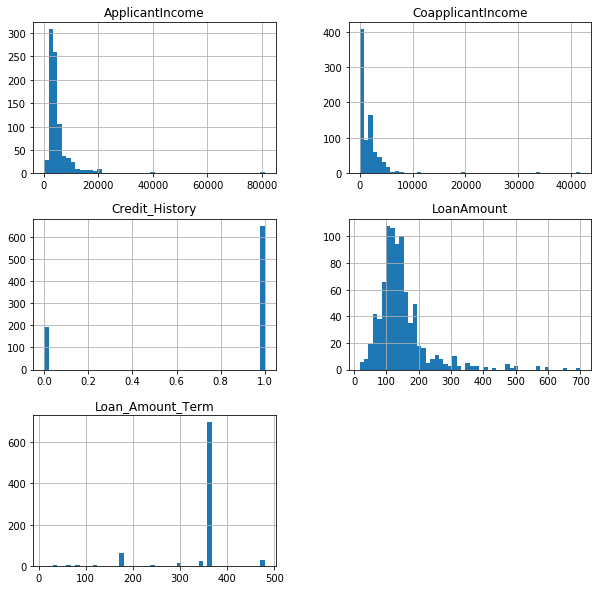

In [73]:
plt.rcParams['figure.figsize'] = [10, 10]
df_over.hist(bins=50)

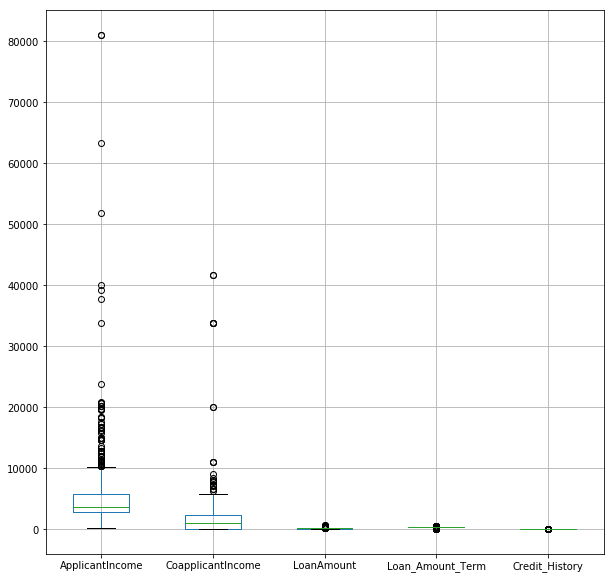

In [74]:
df_over.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292BC255DD8>,
      dtype=object)

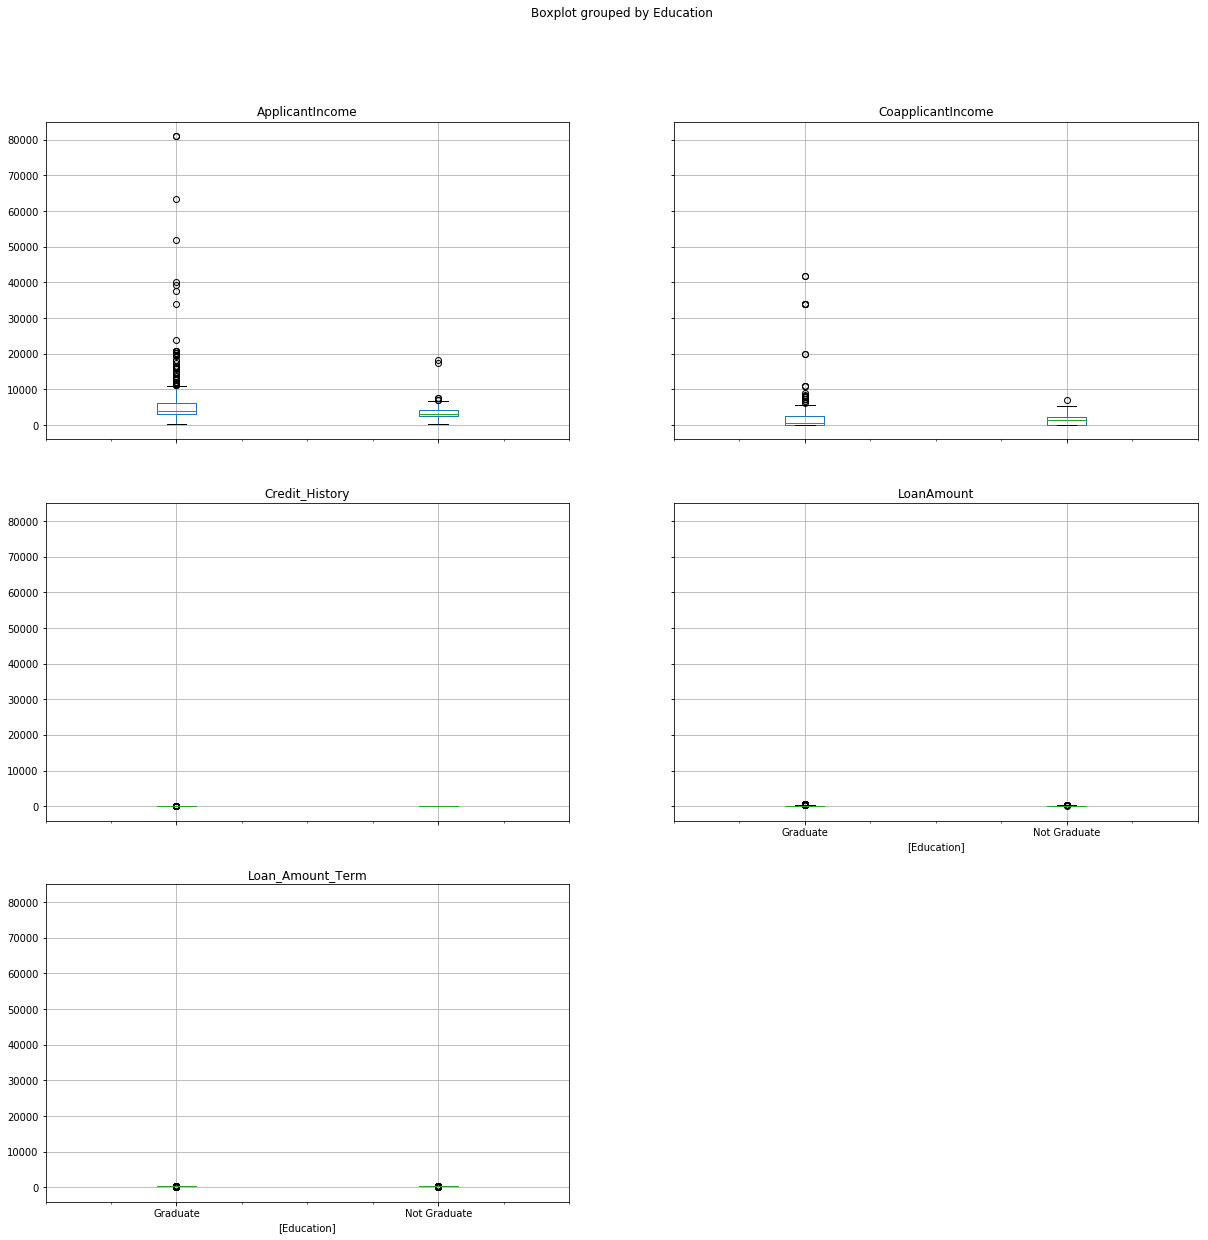

In [75]:
plt.rcParams['figure.figsize'] = [20, 20]
df_over.boxplot(by='Education')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292BD1B3B38>,
      dtype=object)

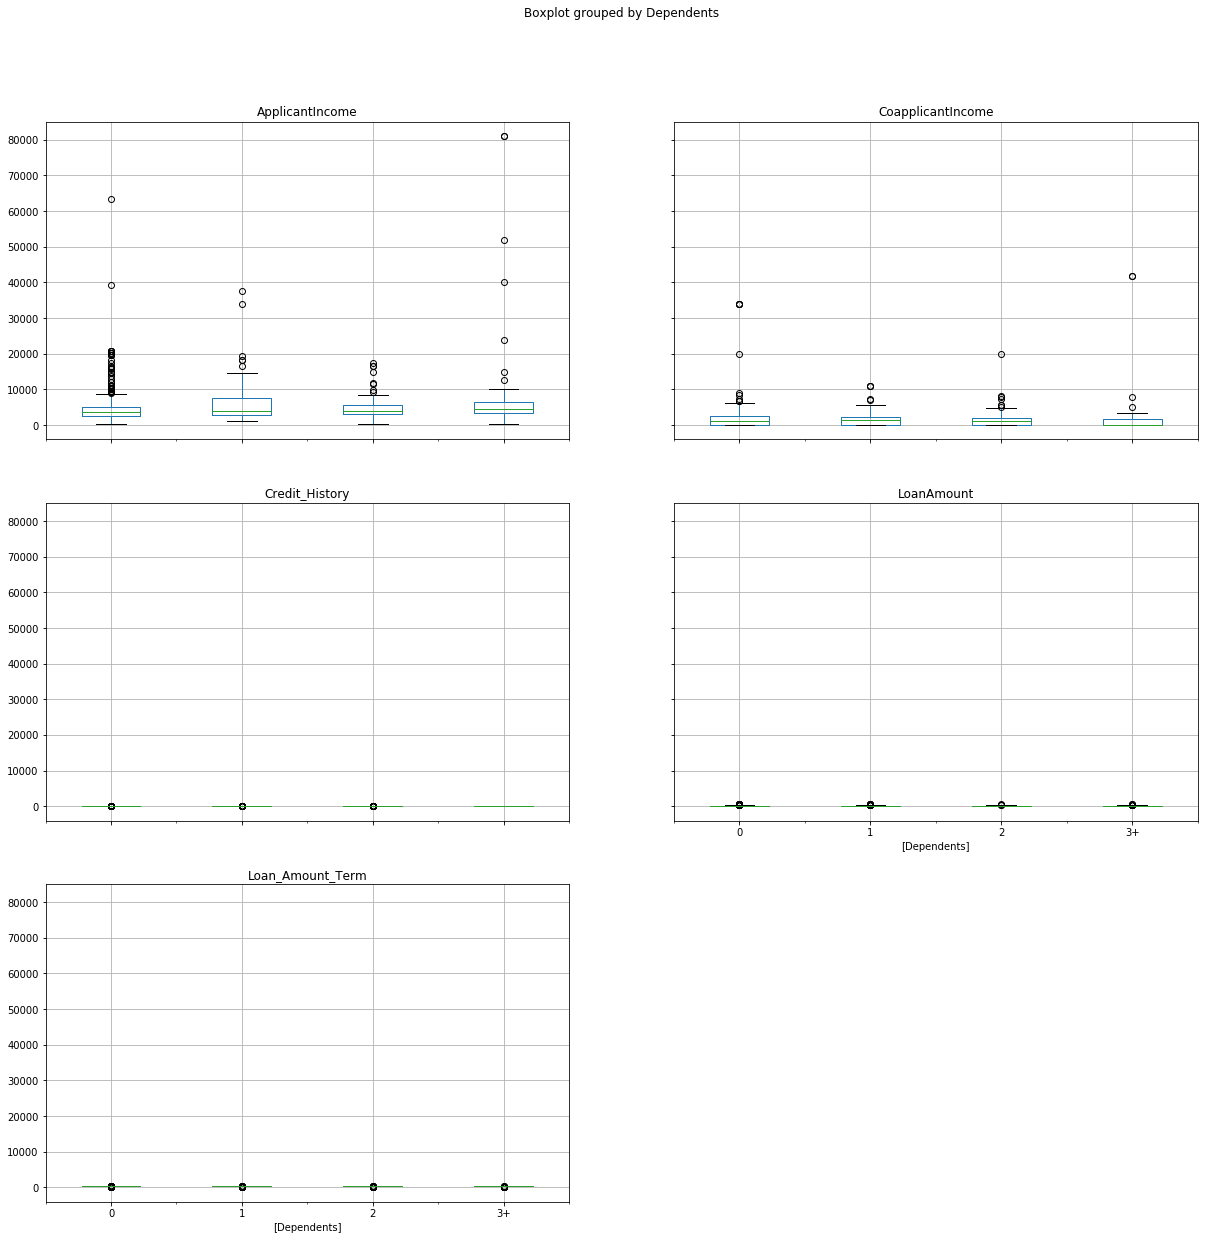

In [76]:
df_over.boxplot(by='Dependents')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292BCCA5128>,
      dtype=object)

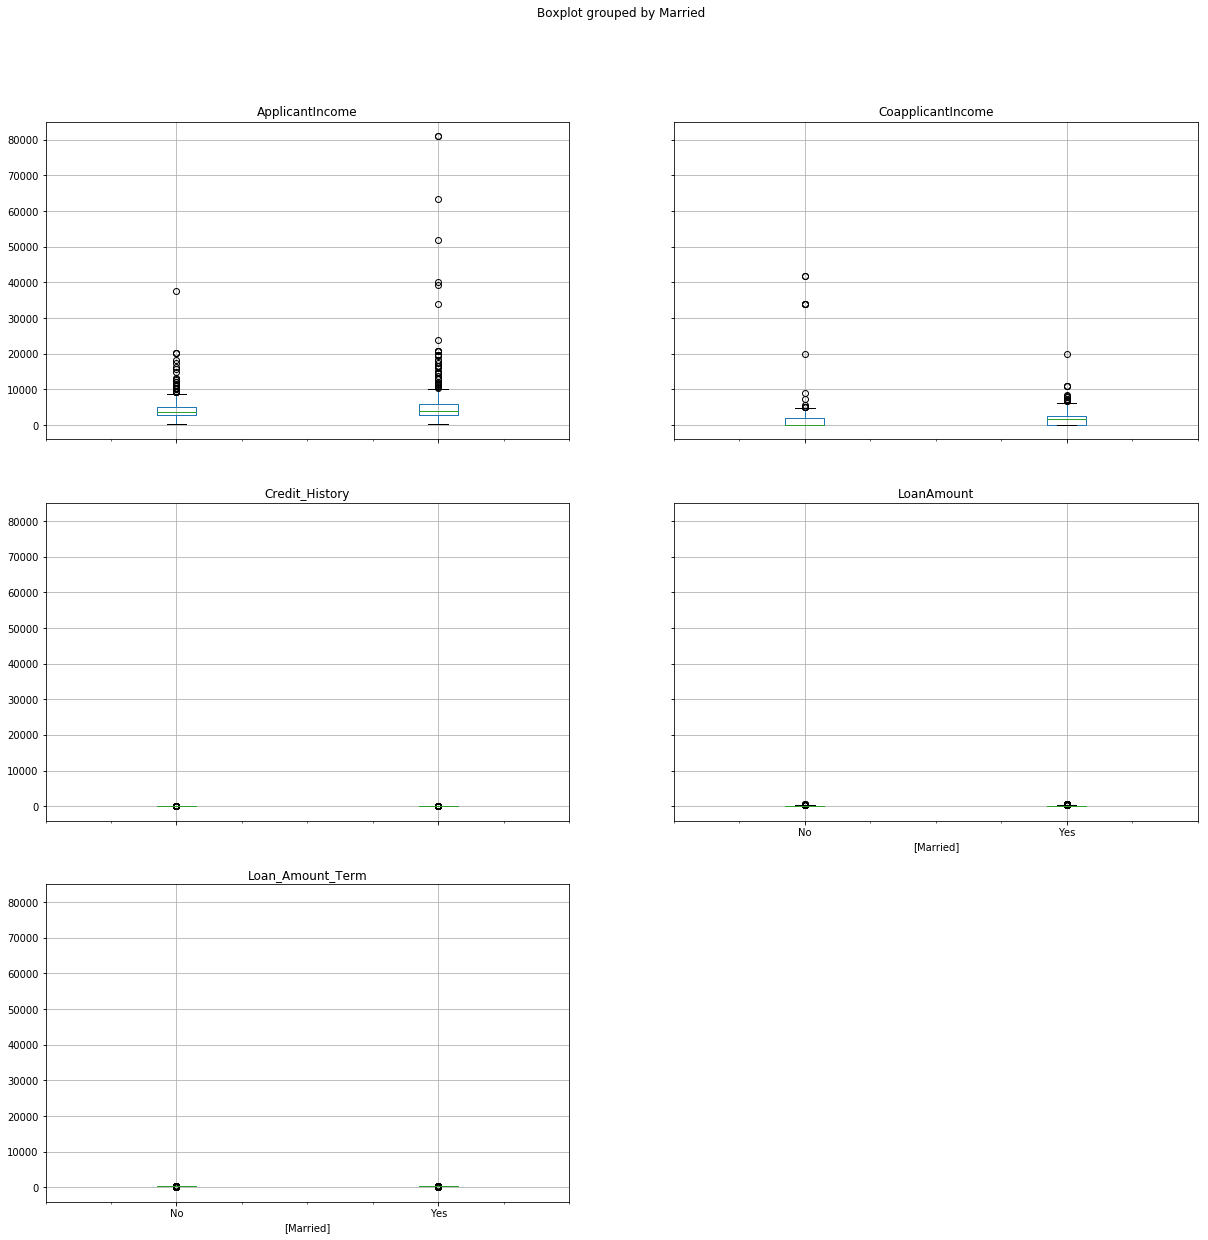

In [77]:
df_over.boxplot(by='Married')

In [125]:
df_over['Total_Income'] = df_over['ApplicantIncome']+df_over['CoapplicantIncome']
df_under['Total_Income'] = df_under['ApplicantIncome']+df_under['CoapplicantIncome']
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

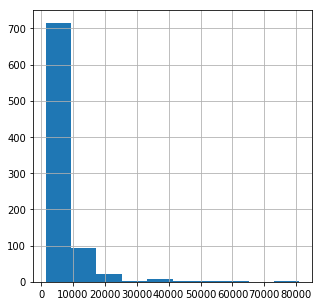

In [79]:
plt.rcParams['figure.figsize'] = [5, 5]
df_over['Total_Income'].hist()

In [126]:
df_over['Total_Income_log'] = np.log(df_over['Total_Income'])
df_under['Total_Income_log'] = np.log(df_under['Total_Income'])
df['Total_Income_log'] = np.log(df['Total_Income'])

Skewness 1.0961509676400059


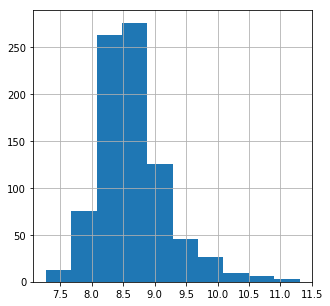

In [81]:
df_over['Total_Income_log'].hist()
print('Skewness',df_over['Total_Income_log'].skew())

In [87]:
df_over.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,1,0,0,0,0,5849,0.0,146.576923,360.0,1,2,1,5849.0,8.674026
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0,8.699515
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1,2,1,9613.0,9.170872


In [127]:
cat_vars=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
from sklearn.preprocessing import LabelEncoder #needed for label encoding the categorical variables
encoder = LabelEncoder()
for i in cat_vars:
    df_over[i]=encoder.fit_transform(df_over[i])
for i in cat_vars:
    df_under[i]=encoder.fit_transform(df_under[i])
for i in cat_vars:
    df[i]=encoder.fit_transform(df[i])

In [128]:
df_over.head()
print(df_under.head())
print(df.head())

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
116  LP001404       0        1           0          0              0   
350  LP002139       1        1           0          0              0   
455  LP002455       1        1           2          0              0   
278  LP001907       1        1           0          0              0   
442  LP002418       1        0           3          1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
116             3167             2283.0       154.0             360.0   
350             9083                0.0       228.0             360.0   
455             3859                0.0        96.0             360.0   
278            14583                0.0       436.0             360.0   
442             4707             1993.0       148.0             360.0   

     Credit_History  Property_Area  Loan_Status  Total_Income  \
116               1              1            1        5450.0  

In [93]:
df_over.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_log'],
      dtype='object')

In [129]:
x_over=df_over[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Total_Income_log','LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
x_under=df_under[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Total_Income_log','LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y_over=df_over['Loan_Status']
y_under=df_under['Loan_Status']
x=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Total_Income_log','LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']

In [101]:
from sklearn.model_selection import train_test_split
x_over_train,x_over_test,y_over_train,y_over_test = train_test_split(x_over,y_over,test_size=0.2,random_state=3)
x_under_train,x_under_test,y_under_train,y_under_test = train_test_split(x_under,y_under,test_size=0.2,random_state=3)

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_over_train,y_over_train)
y_over_pred=model.predict(x_over_test)
print("Accuracy Score is :",accuracy_score(y_over_pred,y_over_test))
print("Classification_Report\n",classification_report(y_over_pred,y_over_test))
print("confusion_matrix\n",confusion_matrix(y_over_pred,y_over_test))

Accuracy Score is : 0.8816568047337278
Classification_Report
              precision    recall  f1-score   support

          0       0.94      0.84      0.88        91
          1       0.83      0.94      0.88        78

avg / total       0.89      0.88      0.88       169

confusion_matrix
 [[76 15]
 [ 5 73]]


In [134]:
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_under_train,y_under_train)
y_under_pred=model.predict(x_under_test)
print("Accuracy Score is :",accuracy_score(y_under_pred,y_under_test))
print("Classification_Report\n",classification_report(y_under_pred,y_under_test))
print("confusion_matrix\n",confusion_matrix(y_under_pred,y_under_test))

Accuracy Score is : 0.6753246753246753
Classification_Report
              precision    recall  f1-score   support

          0       0.68      0.70      0.69        40
          1       0.67      0.65      0.66        37

avg / total       0.68      0.68      0.68        77

confusion_matrix
 [[28 12]
 [13 24]]


In [135]:
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))

Accuracy Score is : 0.8130081300813008
Classification_Report
              precision    recall  f1-score   support

          0       0.54      0.60      0.57        25
          1       0.89      0.87      0.88        98

avg / total       0.82      0.81      0.82       123

confusion_matrix
 [[15 10]
 [13 85]]


In [138]:
model=RandomForestClassifier(n_estimators=15,random_state=3,class_weight="balanced")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))

Accuracy Score is : 0.8048780487804879
Classification_Report
              precision    recall  f1-score   support

          0       0.46      0.59      0.52        22
          1       0.91      0.85      0.88       101

avg / total       0.83      0.80      0.81       123

confusion_matrix
 [[13  9]
 [15 86]]


In [143]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=3)
model.fit(x_over_train,y_over_train)
y_over_pred=model.predict(x_over_test)
print("Accuracy Score is :",accuracy_score(y_over_pred,y_over_test))
print("Classification_Report\n",classification_report(y_over_pred,y_over_test))
print("confusion_matrix\n",confusion_matrix(y_over_pred,y_over_test))

Accuracy Score is : 0.8284023668639053
Classification_Report
              precision    recall  f1-score   support

          0       0.75      0.87      0.81        70
          1       0.90      0.80      0.84        99

avg / total       0.84      0.83      0.83       169

confusion_matrix
 [[61  9]
 [20 79]]


In [144]:
model.fit(x_under_train,y_under_train)
y_under_pred=model.predict(x_under_test)
print("Accuracy Score is :",accuracy_score(y_under_pred,y_under_test))
print("Classification_Report\n",classification_report(y_under_pred,y_under_test))
print("confusion_matrix\n",confusion_matrix(y_under_pred,y_under_test))

Accuracy Score is : 0.6493506493506493
Classification_Report
              precision    recall  f1-score   support

          0       0.61      0.69      0.65        36
          1       0.69      0.61      0.65        41

avg / total       0.65      0.65      0.65        77

confusion_matrix
 [[25 11]
 [16 25]]


In [145]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))

Accuracy Score is : 0.8211382113821138
Classification_Report
              precision    recall  f1-score   support

          0       0.46      0.65      0.54        20
          1       0.93      0.85      0.89       103

avg / total       0.85      0.82      0.83       123

confusion_matrix
 [[13  7]
 [15 88]]
